#Grupo 25 - Entregable AyVD
#Parte 2 de 2

Integrantes:

Rufeil Fiori, Elena

Sosa, Manuel

Taié Mirón, Macarena

Yurovich, Luis Federico


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Trabajo práctico entregable - Parte 2

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import scipy.stats

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [4]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [5]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [6]:
alpha = 0.05

In [7]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

1) Cálculamos la estimación puntual para la resta de medias del salario Neto para Hombres menos la media del salario Neto para otros generos. 
Primero gráficamos las distribuciones de ambas poblaciones. 


(0.0, 500000.0)

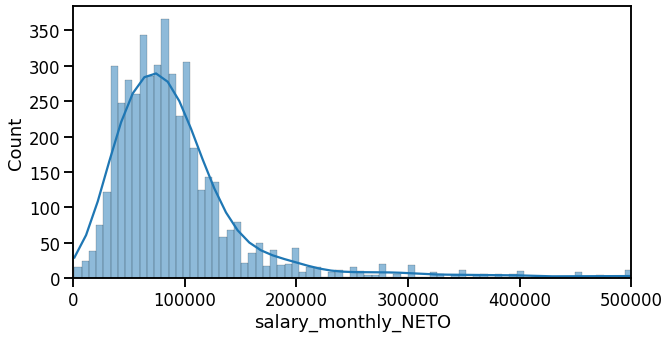

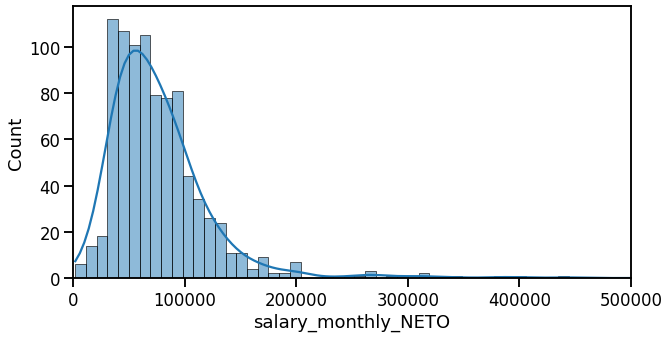

In [8]:
plt.figure(figsize=(10, 5))
seaborn.histplot(data=groupA, kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.xlim([0,500000])
plt.figure(figsize=(10, 5))
seaborn.histplot(data=groupB, kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.xlim([0,500000])

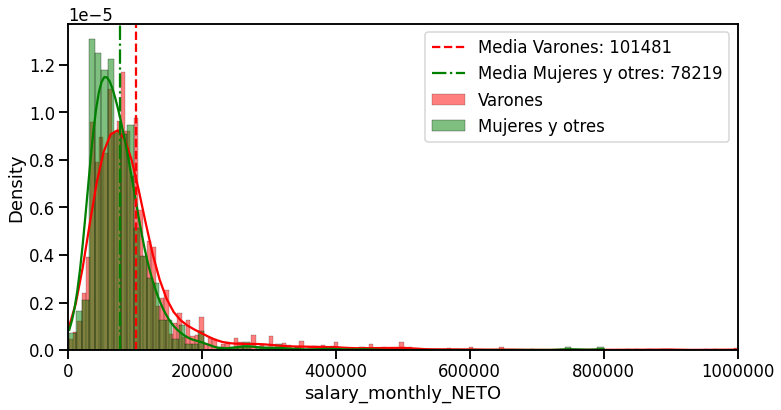

In [10]:
#distribuciones:
plt.figure(figsize=(12, 6))
seaborn.histplot(data=groupA.reset_index(), x='salary_monthly_NETO', kde=True, stat="density", label = "Varones", color="red")
seaborn.histplot(data=groupB.reset_index(), x='salary_monthly_NETO', kde=True, stat="density", label = "Mujeres y otres", color="green") #,alpha=0.2)
plt.axvline(groupA.mean(), color='red',
            linestyle='--', label='Media Varones: '+str(int(groupA.mean())))
plt.axvline(groupB.mean(), color='green',
            linestyle='-.', label='Media Mujeres y otres: '+str(int(groupB.mean())))
#plt.axvline(groupA.median(), color='indigo',
#            linestyle='-.', label='Mediana: '+str(int(groupA.median())))   #orangered
plt.ticklabel_format(style='plain', axis='x')
plt.xlim([0,1000000])
plt.legend();

Observamos que ambas poblaciones se asemejan a una distribución de probabilidad Normal. Ahora vamos a calcular la media y la desviación estandar de cada población.

In [ ]:
print("Media de la población A: ",groupA.mean())
print("Media de la población B: ", groupB.mean())


Media de la población A:  101481.62434267918
Media de la población B:  78219.25094276095


In [ ]:
print("Diferencia de medias: ",groupA.mean()-groupB.mean())

Diferencia de medias:  23262.37339991823


In [ ]:
std_A=groupA.std() # Desviación estandar del grupo A
#var_A=pow(std_A,2) #Varianza del grupo A
print("Desviación estandar del grupo A: ",std_A)
std_B=groupB.std() # Desviación estandar del grupo B
#var_B=pow(std_B,2) #Varianza del grupo B
print("Desviación estandar del grupo B: ",std_B)

Desviación estandar del grupo A:  102215.30468444877
Desviación estandar del grupo B:  56515.32732350074



El estadístico usado como estimador puntual de la diferencia de medias μA − μB, será xA − xB, que es un estimador suficiente.
Como primer resultado tenemos que la estimación puntual de la diferencia de las medias es de 23262. Es decir, los varones ganarían un 29.7% más que las mujeres y otros géneros.

Ahora vamos a calcular el intervalo de confianza para la diferencia de las medias de ambos grupos. Como vemos aqui arriba, las desviaciones estandar son diferentes, por lo tanto,  utilizaremos el método de Welch para el calculo del intervalo de confianza.


In [ ]:
n1 = len(groupA)
n2 = len(groupB)
#muestra_A=groupA.sample(n1,replace=False) # muestra de tamaño n1
#muestra_B=groupB.sample(n2, replace=False) # muestra de tamaño n2
muestra_A=groupA
muestra_B=groupB

In [ ]:
#print("Muestra de la poblacion de hombres")
#print(muestra_A)


In [ ]:
#print("Muestra de la poblacion de mujeres y otros géneros")
#print(muestra_B)


Procedemos a calcular las métricas estadísticas de ambas muestras (media, desviación estandar y varianza)

In [ ]:
media_muestra_A=muestra_A.mean() #media de la mustra A (hombres)
print("Media de la muesta A: ",media_muestra_A)

Media de la muesta A:  101481.62434267918


In [ ]:
media_muestra_B=muestra_B.mean() #media de la muestra B (mujeres y otro géneros)
print("media de la muestra B: ",media_muestra_B)

media de la muestra B:  78219.25094276095


In [ ]:
std_A=muestra_A.std() # Desviación estandar de la muestra A
print("Desviación estandar de la muestra A: ",std_A)
var_A=pow(std_A,2) #Varianza de la muesta A
print("Varianza de la muesta A: ",var_A)

Desviación estandar de la muestra A:  102215.30468444877
Varianza de la muesta A:  10447968511.734694


In [ ]:
std_B=muestra_B.std()
print("Desviación estandar de la muestra B: ",std_B)
var_B=pow(std_B,2)
print("Varianza de la muestra B",var_B)

Desviación estandar de la muestra B:  56515.32732350074
Varianza de la muestra B 3193982222.482429




Usamos para el valor crítico la distribucion t de Student ($t_ᵅ)$ con $\nu$ grados de libertad, donde $\nu$ viene dado por la fórmula de Welch.

Si las varianzas poblacionales no pueden suponerse iguales los límites del intervalo de confianza son: 
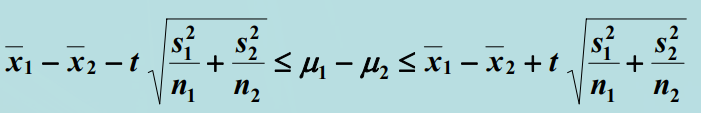

Calculamos los grados de libertad DF:

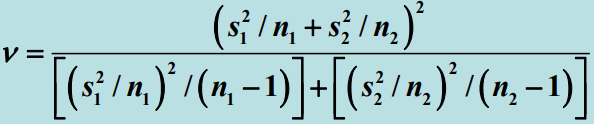


In [ ]:
DF=(pow((pow(std_A,2)/n1)+(pow(std_B,2)/n2),2))/((pow((pow(std_A,2)/n1),2)/n1-1)+(pow((pow(std_B,2)/n2),2)/n2-1))
print("Grados de libertad: ",DF)

Grados de libertad:  2150.339203756446


A continuación obtenemos el valor crítico para alpha=0.05 y los grados de libertad calculado en el código anterior

In [ ]:
t0975=scipy.stats.t.ppf(0.975, int(DF))
t0975

1.9610679773649038

**Cálculo del límite inferior del intervalo de confianza**

In [ ]:
lim_inf=(media_muestra_A-media_muestra_B)-(t0975*(numpy.sqrt((var_A/n1)+(var_B/n2))))
print("Límite inferior: ",round(lim_inf,3))

Límite inferior:  18558.019


**Cálculo del límite superior del intervalo de confianza**

In [ ]:
lim_sup=(media_muestra_A-media_muestra_B)+(t0975*(numpy.sqrt((var_A/n1)+(var_B/n2))))
print("Límite superior: ",round(lim_sup,3))

Límite superior:  27966.728


**Intervalo de confianza**

In [ ]:
print(round(lim_inf,3),"<=μA−μB<=",round(lim_sup,3))


18558.019 <=μA−μB<= 27966.728


Obtenemos que, con un nivel de confianza del 95% la resta de medias poblacional pertenece al intervalo [18558, 27966]. Por lo que vemos, es poco probable que la diferencia de medias sea cero. Esto significa que hay una diferencia significativa entre el sueldo promedio de los varones y aquel de las mujeres y otros géneros, dando el primero más alto que el segundo.

**¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?** 


Un test de hipotesis cuya Ho sea que la diferencia de las medias es cero, el caso de que el intervalo de confianza contenga el valor "cero",  siginificaria que las medias poblacionales son iguales, aceptando la hipotesis nula. El caso contrario, si el intervalo no continene al valor "cero" las medias son diferentes.

El resultado obtenido nos muestra un intervalo de confianza que no contiene al "cero". Es decir, que las medias poblacionales no son iguales.


## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos compenentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=...$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


Para el test de hipótesis, planteamos como hipótesis nula que las medias de los grupos A y B son iguales. Y como hipótesis alternativa que dichas medias son distintas.

$H_0$: $\mu_A$=$\mu_B$  ó   $\mu_A$-$\mu_B$=0


$H_a$: $\mu_A$!=$\mu_B$ ó  $\mu_A$-$\mu_B$!=0



El estadistico (pivote) asociado será la variable T definida como: 

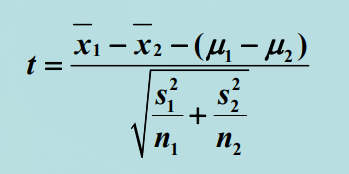

que tiene asociado una distribuciín t de student. En este caso $\mu_1 - \mu_2 = 0$ dado que la hipótesis nula que se formuló anteriormente indica que las medias de ambas poblaciones son iguales. $\bar{x}_1 -\bar{x}_2$ es la diferencia de las medias muestrales. También se observa que estan involucrados en el cálculo del estimador el tamaño de las muestras y sus respectivas varianzas. 

Calculamos el estadistico T 

In [ ]:
T=(media_muestra_A-media_muestra_B)/(numpy.sqrt((var_A/n1)+(var_B/n2)))
print("Estadístico T: ",T)

Estadístico T:  9.697205976350695


### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

Calculamos el p-valor

In [ ]:
scipy.stats.ttest_ind(muestra_A, muestra_B, equal_var=False)


Ttest_indResult(statistic=9.697205976350673, pvalue=8.605197322133209e-22)

El p-valor nos muestra la probabilidad de que el valor estadístico T calculado con nuestras muestras sea posible dado que la hipótesis nula es cierta. Se suele decir que valores altos de p no permiten rechazar la Ho, mientras que valores bajos de p sí permiten rechazar la Ho.
En nuestro caso particular, se obtuvo un p-valor extremadamente bajo y menor al nivel de significancia (0.05). Con esto, estamos en condiciones de rechazar rotundamente la Ho, lo que significa que la distribución de los salarios es distinta entre los grupos A y B.

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)
power=0.95

In [ ]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

492.8117730249087

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


#Resolución ejercicio 3

Para este ejercicio elegimos la pregunta si el sueldo promedio neto depende del genero, y lo comunicaremos usanto el tipo tweet.

Para ello involucramos en nuestro análisis la variable de años de experiencia.

Acá abajo vemos el código utilizado y entregamos en archivo aparte un pdf.

In [ ]:
df_graph = df[["profile_years_experience", "profile_gender", "salary_monthly_NETO"]]
df_graph = df_graph[df_graph["profile_years_experience"] < numpy.quantile(df_graph["profile_years_experience"], 0.99)]
df_graph = df_graph[df_graph["profile_years_experience"] >= 0]
# Genero BINS de años de experiencia
def profile_groups(year):
  if year > 0 and year <=3:
    return '0 a 3'
  elif year >3 and year <=6:
    return '3 a 6'
  elif year > 6:
    return 'Mas de 6'
  else:
    return None
df_graph["years_grouped"] = df_graph["profile_years_experience"].apply(profile_groups)
#df_graph["years_grouped"] = pd.cut(df_graph["profile_years_experience"], 10)
# Reemplazo a otros con mujer
df_graph["profile_gender"] = df_graph["profile_gender"].replace(['Otros', "Mujer"], "Mujeres y Otres").replace("Hombre", "Varones")

df_graph = df_graph.rename(columns = {"profile_gender" : "Género", 
                                      "years_grouped" : "Años de experiencia en el rubro",
                                      "salary_monthly_NETO" : "Salario mensual neto promedio"})

In [ ]:
grouped = df_graph.groupby(["Género"])["Salario mensual neto promedio"].mean().astype(int)
(grouped.iloc[1] - grouped.iloc[0]) / grouped.iloc[0]

0.32809167723996435

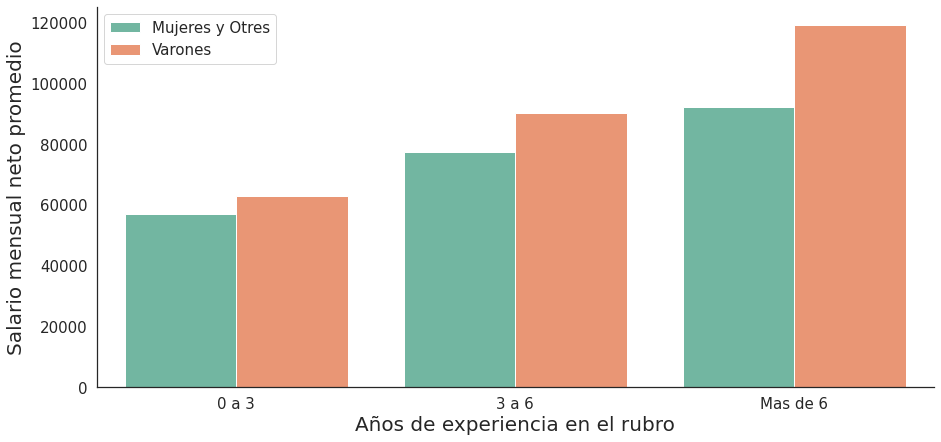

In [ ]:
from numpy import mean,median, std
seaborn.set_theme(style="white", palette="Set2")

plt.figure(figsize = [15,7])
seaborn.barplot(data = df_graph, x = "Años de experiencia en el rubro", y = "Salario mensual neto promedio", hue= "Género", estimator = mean, ci = None)# ci = 95
seaborn.despine()
plt.tick_params(labelsize = 15)
plt.xlabel("Años de experiencia en el rubro", fontsize=20)
plt.ylabel("Salario mensual neto promedio",   fontsize=20)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
df_graph.groupby(["Años de experiencia en el rubro", "Género"])['Salario mensual neto promedio'].mean().round()

Años de experiencia en el rubro  Género         
0 a 3                            Mujeres y Otres     57207.0
                                 Varones             63013.0
3 a 6                            Mujeres y Otres     77471.0
                                 Varones             90387.0
Mas de 6                         Mujeres y Otres     92336.0
                                 Varones            119302.0
Name: Salario mensual neto promedio, dtype: float64